# Fig 7 signal-to-noise ratio gif

This notebook creates an animated visualizer showing how variable SNR can influence estimates.

Based on Fig 7 (a-d) of the oscillation methods paper. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neurodsp.filt import filter_signal
from neurodsp.spectral import compute_spectrum, trim_spectrum
from neurodsp.timefrequency import amp_by_time, freq_by_time, phase_by_time
from neurodsp.sim import sim_powerlaw, sim_oscillation

In [2]:
import seaborn as sns
sns.set_context('poster')

In [3]:
# Import custom code
from code.plts import plot_timeseries, plot_spectra
from code.gif import clear_output, _gif_plot_output

## SETTINGS

In [4]:
n_seconds = 30
fs = 1000
exp = -1 
ap_filt = (2, 100)
cf = 10

In [5]:
alpha_range = [8, 12]
alpha_color = '#1882d9'

In [6]:
band_range = (cf-2, cf+2)
osc_pow = 0.5

In [38]:
xlim = [5000, 6500]

## DEFINE AXES

In [7]:
def make_axes():
    
    fig = plt.figure(figsize=(12, 4), constrained_layout=True)
    gs = fig.add_gridspec(2, 6)

    ax1 = fig.add_subplot(gs[0:, 0:2])
    ax2 = fig.add_subplot(gs[0, 2:4])
    ax3 = fig.add_subplot(gs[1, 2:4])
    ax4 = fig.add_subplot(gs[0, 4:])
    ax5 = fig.add_subplot(gs[1, 4:])
    
    return fig, ax1, ax2, ax3, ax4, ax5

## SIMULATE SIGNAL

In [8]:
ap = sim_powerlaw(n_seconds, fs, exp, f_range=ap_filt, variance=0.5)
osc = sim_oscillation(n_seconds, fs, cf, variance=osc_pow)

In [9]:
sig = ap + osc

In [10]:
freqs, powers = trim_spectrum(*compute_spectrum(sig, fs), [3, 40])

In [11]:
filted = filter_signal(sig, fs, 'bandpass', band_range)

In [12]:
pha = phase_by_time(sig, fs, band_range)
fre = freq_by_time(sig, fs, band_range)

## EXAMPLE PLOT

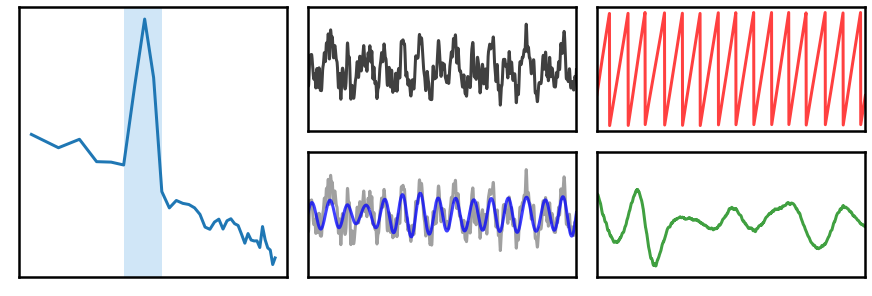

In [14]:
fig, ax1, ax2, ax3, ax4, ax5 = make_axes()

plot_spectra(freqs, powers, 
             shade_ranges=[alpha_range], shade_colors=[alpha_color], ax=ax1)

plot_timeseries(sig, xlim=xlim, colors='black', alpha=0.75, ax=ax2)
plot_timeseries([sig, filted], colors=['grey', 'blue'], alpha=0.75, xlim=xlim, ax=ax3)

plot_timeseries(pha, colors='red', xlim=xlim, alpha=0.75, ax=ax4)
plot_timeseries(fre, colors='green', xlim=xlim, alpha=0.75, ax=ax5)

## BUILDER FUNCTIONS

In [35]:
def build_all(osc_powers, sleep=0.5, n_build=100, save=False):
        
    ## Create builds
    for b_ind, osc_pow in enumerate(osc_powers):
        
        # Create the signal
        osc = sim_oscillation(n_seconds, fs, cf, variance=osc_pow)
        sig = ap + osc
        
        # Create the derived measures
        freqs, powers = trim_spectrum(*compute_spectrum(sig, fs), [5, 40])
        filted = filter_signal(sig, fs, 'bandpass', band_range)
        pha = phase_by_time(sig, fs, band_range)
        fre = freq_by_time(sig, fs, band_range)
        
        # Create the plot
        clear_output(wait=True)
        
        fig, ax1, ax2, ax3, ax4, ax5 = make_axes()
        
        plot_spectra(freqs, powers, ylim=[-3, -0.01],
                     shade_ranges=[alpha_range], shade_colors=[alpha_color], ax=ax1)
        plot_timeseries(sig, xlim=xlim, ylim=[-3.75, 3.75],
                        colors='black', alpha=0.75, ax=ax2)
        plot_timeseries([sig, filted], xlim=xlim, ylim=[-3.75, 3.75],
                        colors=['grey', 'blue'], alpha=0.75,  ax=ax3)

        plot_timeseries(pha, colors='red', xlim=xlim, alpha=0.75, ax=ax4)
        plot_timeseries(fre, colors='green', xlim=xlim, ylim=[cf-5, cf+5], alpha=0.75, ax=ax5)

        _gif_plot_output(fig, save, b_ind, 'fig7', sleep)

## ANIMATED PLOT

In [36]:
osc_powers = [1, 0.75, 0.5, 0.25, 0.15, 0.1, 0.05, 0.01, 0, 
              0.01, 0.05, 0.1, 0.15, 0.25, 0.5, 0.75]

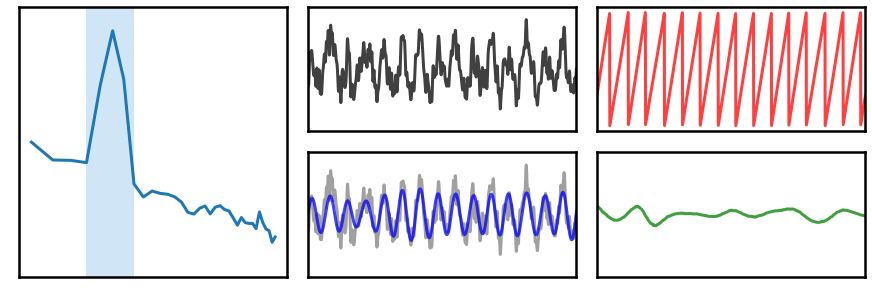

In [37]:
build_all(osc_powers)